### Genetic Algorithm to find a bitstrong of all 1s

You can find the [genetic algorithm base class here](https://golb.us/SummerSpringboard/GA/ga.py). You need to download it, then click on the folder icon and upload it into the colab environment.

To adopt it to our specific problem, we need to implement

  1. A method for generating new members of the population
  2. A fitness function

In [1]:
import random

from matplotlib import pyplot as plt

from ga import GA

In [2]:
class BitstringGA(GA):

    def __init__(self, generations, population_size, length, **kwargs):
        super().__init__(generations, population_size, **kwargs)
        self.length = length

    def generate(self, **kwargs):
        return [1 if random.random() < 0.5 else 0 for _ in range(self.length)]

    def calculate_fitness(self, bitstring, **kwargs):
        return sum(bitstring)

### Parameters of a Genetic Algorithm

Genetic Algorithms have several parameters, within each generation we need to know the
  * Size of the population
  * The probability of a bit getting flipped while mutating
  * The probability of a pair of individuals choosing to cross over

We also need to know the number of generations to breed before declaring we have the best candidate.

For this problem, we also need to know the length of the string.

In [3]:
# Genetic Algorithm parameters
POPULATION_SIZE = 100
MUTATION_RATE = 0.01
CROSSOVER_RATE = 0.7
GENERATIONS = 1000

# bitstring parameters
LENGTH = 16

### Let's find some strings consisting of all 1s!

We'll define a simple function that uses matplotlib (we'll say a lot more about this later) to plot how the fitness score goes up over time and plot some runs.

In [6]:
def fitness_plots(ga_runner, plots=5):
    """Generate plots showing how fitness changes over time"""
    
    for i in range(plots):
        scores = ga_runner.select(CROSSOVER_RATE, MUTATION_RATE, success_score=LENGTH)
        plt.plot(scores)
        plt.ylim(0,LENGTH+4)
        max_score = scores[-1]
        if max_score == LENGTH:
            plt.title(f"\nSolution found in generation {len(scores)}")
        else:
            plt.title(f"\nSolution not found. Max score: {max_score}")
        plt.xlabel("Generations")
        plt.ylabel("Fitness Score")
        plt.show()
        if i != plots - 1:
            print("\n\n-----------------------------------------------------------------------------------")

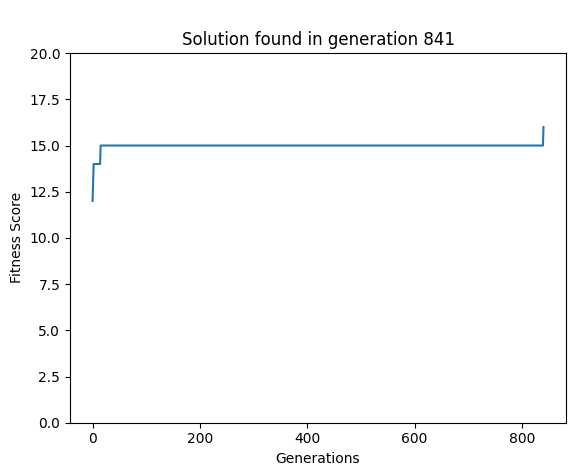



-----------------------------------------------------------------------------------


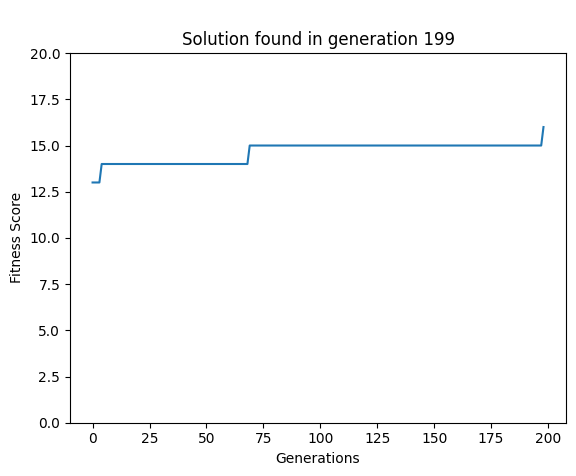



-----------------------------------------------------------------------------------


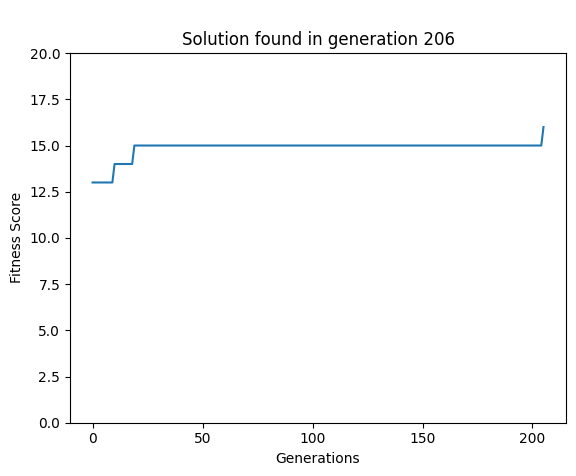



-----------------------------------------------------------------------------------


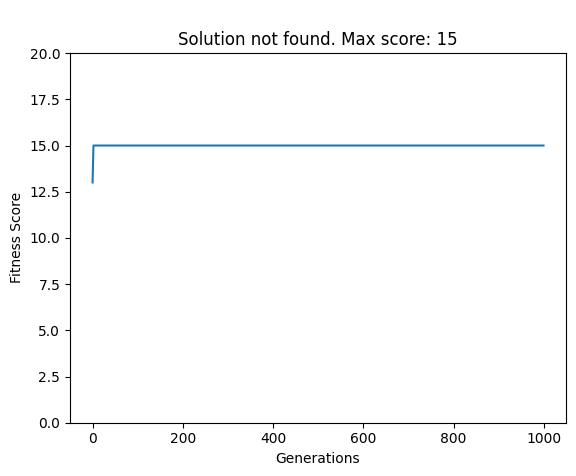



-----------------------------------------------------------------------------------


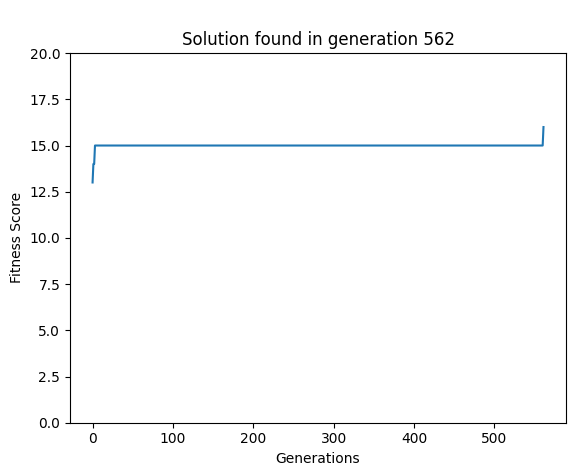

In [7]:
ga_runner = BitstringGA(GENERATIONS, POPULATION_SIZE, LENGTH)
fitness_plots(ga_runner)